In [2]:
#Support Vector Machine Classification
#Import Required Liabries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
filename = '/content/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes = pd.read_csv(filename, names=names)
array = diabetes.values
# Split the X and Y  data into Array
diabetes1 = array[:,0:8]
diabetes2 = array[:,8]

In [4]:
#Split the data into train and test
diabetes1_train,diabetes1_test,diabetes2_train,diabetes2_test =train_test_split(diabetes1,diabetes2,test_size=0.3)

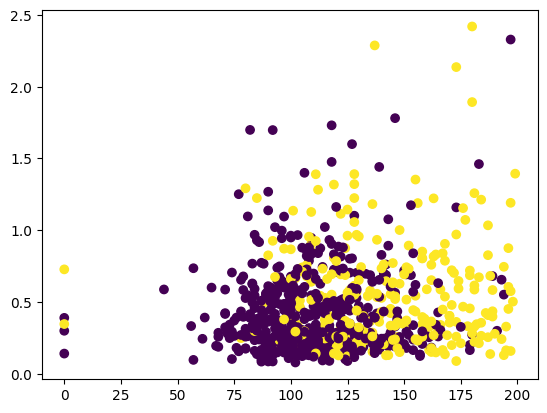

In [20]:
import matplotlib.pyplot as plt
plt.scatter(diabetes['plas'],diabetes['pedi'],c=diabetes['class'])
#try scatter plot with other features as well mass and pedi

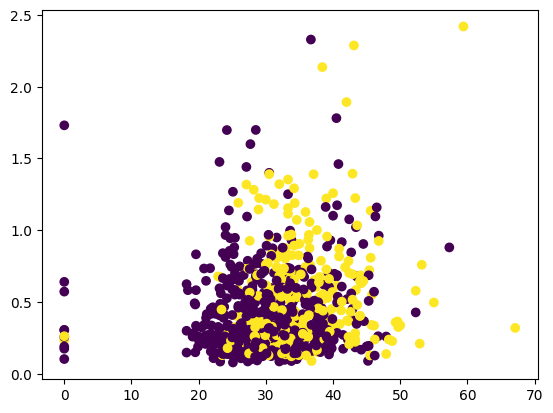

In [19]:
plt.scatter(diabetes['mass'],diabetes['pedi'],c=diabetes['class'])

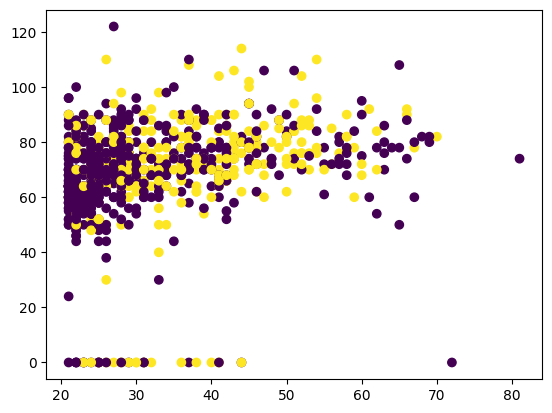

In [8]:
plt.scatter(diabetes['age'],diabetes['pres'],c=diabetes['class'])

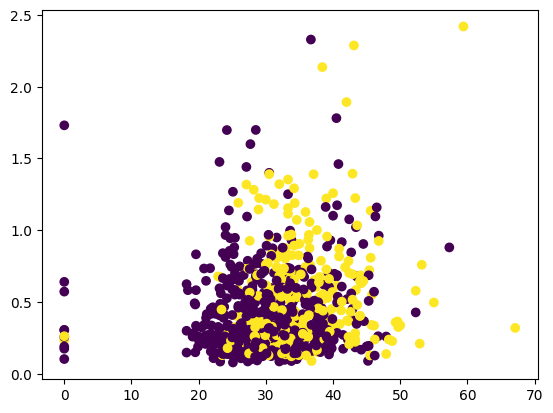

In [18]:
plt.scatter(diabetes['mass'],diabetes['pedi'],c=diabetes['class'])

In [12]:
clf = SVC(kernel='rbf',gamma=0.0001)
clf.fit(diabetes1_train,diabetes2_train)
diabetes_prediction=clf.predict(diabetes1_test)
acc=accuracy_score(diabetes2_test,diabetes_prediction)*100
print("Accuracy= ",acc)
confusion_matrix(diabetes2_test,diabetes_prediction)

Accuracy=  80.60344827586206


array([[140,  12],
       [ 33,  47]])

In [13]:
((140+33)/(140+12+47+33))*100

74.56896551724138

#Grid Search CV

In [14]:
# to get optimal value of gamma use grid search cv
clf =SVC()
# can put ['linear','rbf','poly'], give range for gamma i.e. C as a regularization parameter. Best out of it will be selected by algorithm. rbf-radial basis function
param_grid =[{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.0001],'C':[1,15,14,13,12,11,10,0.1] }] # 6 X 8 =48 models will be created and will give best out of it.}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(diabetes1_train,diabetes2_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.0001],
                          'kernel': ['rbf']}])

In [16]:
gsv.best_params_, gsv.best_score_ #74% Accuaracy

({'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.7458420684835779)

In [17]:
clf = SVC(C=1,gamma=0.0001,kernel='rbf') # can change kernel and check accuracy
clf.fit(diabetes1_train, diabetes2_train) #build model
diabetes2_prediction = clf.predict(diabetes1_test)#predict on test dataset
acc = accuracy_score(diabetes2_test, diabetes2_prediction) * 100
print("Accuracy =", acc)
confusion_matrix(diabetes2_test,diabetes2_prediction)

Accuracy = 80.60344827586206


array([[140,  12],
       [ 33,  47]])